#The Greedy Algorithm

In [1]:
import numpy as np

# Function to calculate the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Function to calculate the perimeter of a cluster
def cluster_perimeter(cluster):
    perimeter = 0
    for i in range(len(cluster)):
        for j in range(i + 1, len(cluster)):
            perimeter += euclidean_distance(cluster[i], cluster[j])
    return perimeter

# Greedy Algorithm to distribute points into clusters while minimizing perimeter
def greedy_cluster(points, k, isoperimetric_constraint):
    convex_hull = [min(points, key=lambda p: p[1])]
    points.remove(convex_hull[0])

    for _ in range(k - 1):
        furthest_point = max(points, key=lambda p: euclidean_distance(convex_hull[-1], p))
        convex_hull.append(furthest_point)
        points.remove(furthest_point)

    clusters = [[] for _ in range(k)]

    for point in points:
        min_increase = float('inf')
        best_cluster = None

        for i in range(k):
            temp_cluster = clusters[i] + [point]
            temp_perimeter = cluster_perimeter(temp_cluster)

            if temp_perimeter <= isoperimetric_constraint and temp_perimeter - cluster_perimeter(clusters[i]) < min_increase:
                min_increase = temp_perimeter - cluster_perimeter(clusters[i])
                best_cluster = i

        if best_cluster is not None:
            clusters[best_cluster].append(point)

    return clusters

# Generate some random points
np.random.seed(0)
points = [(np.random.rand(), np.random.rand()) for _ in range(30)]

# Set the number of clusters and isoperimetric constraint
k = 3
isoperimetric_constraint = 15.0

# Solve the problem using the Greedy Algorithm
resulting_clusters = greedy_cluster(points, k, isoperimetric_constraint)

# Print the resulting clusters
for i, cluster in enumerate(resulting_clusters):
    print(f'Cluster {i + 1}: {cluster}')


Cluster 1: [(0.5488135039273248, 0.7151893663724195), (0.4375872112626925, 0.8917730007820798), (0.5680445610939323, 0.925596638292661), (0.02021839744032572, 0.832619845547938), (0.46147936225293185, 0.7805291762864555), (0.26455561210462697, 0.7742336894342167), (0.018789800436355142, 0.6176354970758771), (0.2088767560948347, 0.16130951788499626)]
Cluster 2: [(0.6027633760716439, 0.5448831829968969), (0.9636627605010293, 0.3834415188257777), (0.7781567509498505, 0.8700121482468192), (0.978618342232764, 0.7991585642167236), (0.6120957227224214, 0.6169339968747569), (0.9437480785146242, 0.6818202991034834), (0.6667667154456677, 0.6706378696181594), (0.5701967704178796, 0.43860151346232035), (0.6531083254653984, 0.2532916025397821)]
Cluster 3: [(0.4236547993389047, 0.6458941130666561), (0.7917250380826646, 0.5288949197529045), (0.07103605819788694, 0.08712929970154071), (0.11827442586893322, 0.6399210213275238), (0.5218483217500717, 0.4146619399905236), (0.45615033221654855, 0.568433948

#The Cheeger Algorithm

In [30]:
import networkx as nx
import numpy as np
from scipy.optimize import minimize_scalar

# Create a sample connected graph
G = nx.Graph() # This creates the graph containg nodes but no edges
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]) # This creates the edges.

# Define the budget constraint
budget = 3

# Calculate the number of nodes in the graph
num_nodes = len(G)

# Define the objective function to maximize the Cheeger constant
def objective_function(node_subset):
    if len(node_subset) != budget:
        return float("-inf")  # Penalize subsets that don't meet the budget constraint

    # Create a subgraph using the selected nodes
    subgraph = G.subgraph(node_subset)

    # Calculate the Cheeger constant
    cut_size = len(nx.minimum_edge_cut(subgraph))
    volume = sum(dict(subgraph.degree()).values())  # Calculate volume by summing degrees

    if volume == 0:
        return 0

    return cut_size / volume

# Define the optimization problem as a minimization problem
result = minimize_scalar(lambda x: -objective_function([node for node in range(1, num_nodes + 1) if node <= x]), bounds=(budget, budget))

# Extract the optimal subset of nodes
optimal_subset = [node for node in range(1, num_nodes + 1) if node <= result.x]

# Check if the selected edges create a valid cut
subgraph = G.subgraph(optimal_subset)
cut_set = set(nx.minimum_edge_cut(subgraph))

# Output the optimal subset, Cheeger constant, and selected edges
print("Optimal Subset of Nodes:", optimal_subset)
print("Optimal Cheeger Constant:", -result.fun)
if cut_set:
    print("Edges in the Final Cut:", cut_set)
else:
    print("No valid cut found within the budget constraint.")


Optimal Subset of Nodes: [1, 2, 3]
Optimal Cheeger Constant: 0.3333333333333333
Edges in the Final Cut: {(1, 2), (1, 3)}


#Swarm exploration strategy

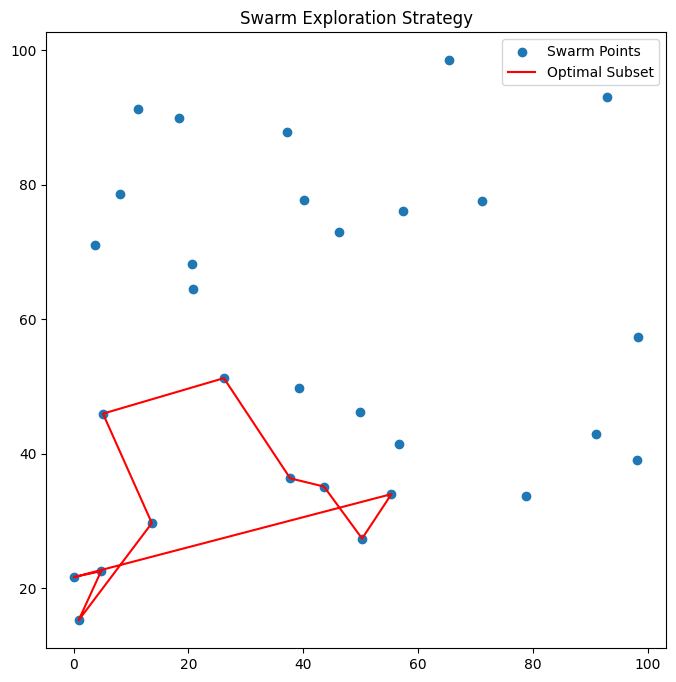

In [31]:
import random
import matplotlib.pyplot as plt

# Generate random points as the swarm
num_points = 30
swarm_points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(num_points)]

# Function to calculate the perimeter of a subset of points
def calculate_perimeter(points):
    perimeter = 0
    for i in range(len(points)):
        x1, y1 = points[i]
        x2, y2 = points[(i + 1) % len(points)]
        perimeter += ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return perimeter

# Function to plot the swarm and a selected subset of points
def plot_swarm_and_subset(swarm, subset):
    swarm_x, swarm_y = zip(*swarm)
    subset_x, subset_y = zip(*subset)

    plt.figure(figsize=(8, 8))
    plt.scatter(swarm_x, swarm_y, marker='o', label='Swarm Points')
    plt.plot(subset_x + (subset_x[0],), subset_y + (subset_y[0],), color='red', label='Optimal Subset')
    plt.legend()
    plt.title('Swarm Exploration Strategy')
    plt.show()

# Greedy algorithm for selecting a subset of points that minimizes boundary while covering area
def optimize_swarm_exploration(swarm, num_subset_points):
    subset = []
    remaining_points = list(swarm)

    while len(subset) < num_subset_points:
        best_point = None
        best_boundary = float('inf')

        for point in remaining_points:
            current_subset = subset + [point]
            current_boundary = calculate_perimeter(current_subset)
            if current_boundary < best_boundary:
                best_point = point
                best_boundary = current_boundary

        if best_point:
            subset.append(best_point)
            remaining_points.remove(best_point)

    return subset

# Number of points to select in the optimal subset
num_subset_points = 10

# Find the optimal subset
optimal_subset = optimize_swarm_exploration(swarm_points, num_subset_points)

# Display the optimal subset and the swarm
plot_swarm_and_subset(swarm_points, optimal_subset)
